In [1]:
import numpy as np
import astroML.datasets
from astroML.datasets import fetch_dr7_quasar
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from astroML.density_estimation import EmpiricalDistribution
import scipy.stats
import scipy

In [2]:
# Fetch the quasar data

data = fetch_dr7_quasar()

# select the first 10000 points

data = data[:10000]

z = data['redshift']

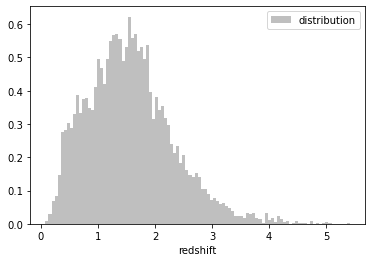

In [4]:
#defining and plotting the redshift distribution

counts, bins = np.histogram(z, bins=100, density=True)
distribution=scipy.stats.rv_histogram((counts,bins))

plt.hist(z,bins=100,color='gray',density=True,alpha=0.5,label='distribution');
plt.xlabel('redshift')
plt.legend()
plt.show()

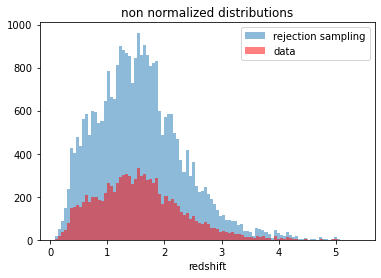

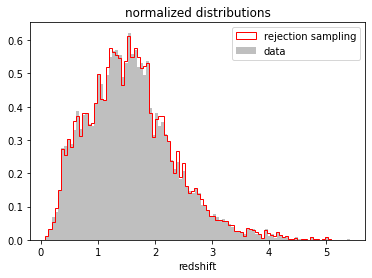

In [10]:
#rejection sampling

n=100000

#sampling points
x=np.random.uniform(0,np.max(z),n)
y=np.random.uniform(0,counts.max(),n)

#defining a mask and applying it 
mask=y<distribution.pdf(x)
goodpoints=x[mask]

#plotting non normalized distributions

plt.hist(goodpoints,bins=100,alpha=0.5,label='rejection sampling');
plt.hist(z,bins=100,color='red',alpha=0.5,label='data');
plt.xlabel('redshift')
plt.legend()
plt.title('non normalized distributions')
plt.show()

#plotting normalized distributions

plt.hist(goodpoints,bins=100,color='red',density=True,histtype='step',label='rejection sampling');
plt.hist(z,bins=100,color='gray',density=True,alpha=0.5,label='data');
plt.xlabel('redshift')
plt.title('normalized distributions')
plt.legend()
plt.show()

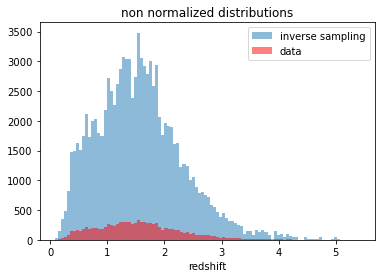

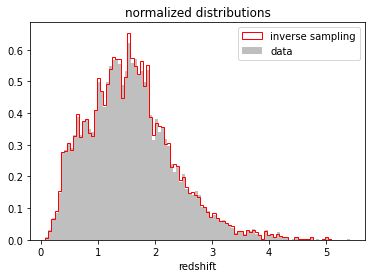

In [11]:
#inverse sampling

z_cloned=EmpiricalDistribution(z).rvs(100000)

#plotting non normalized distributions

plt.hist(z_cloned,bins=100,alpha=0.5,label='inverse sampling');
plt.hist(z,bins=100,color='red',alpha=0.5,label='data');
plt.xlabel('redshift')
plt.legend()
plt.title('non normalized distributions')
plt.show()

#plotting normalized distributions

plt.hist(z_cloned,bins=100,color='red',density=True,histtype='step',label='inverse sampling');
plt.hist(z,bins=100,color='gray',density=True,alpha=0.5,label='data');
plt.xlabel('redshift')
plt.title('normalized distributions')
plt.legend()
plt.show()

## Doing some cosmology

In [12]:
import astropy
A=astropy.cosmology.Planck15

In [13]:
#defining the differential comoving volume function

def differential_comoving_volume(z):
    return 4*np.pi*A.differential_comoving_volume(z).value

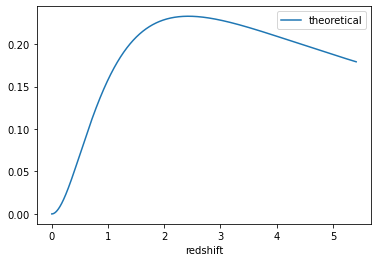

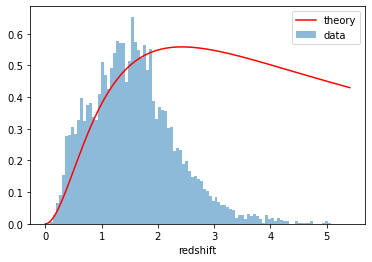

In [17]:
#defining a grid for plotting

zgrid=np.linspace(0,np.max(z),10000)

#computing the normalized theoretical result

normalization=scipy.integrate.quad(differential_comoving_volume,0,np.max(z))[0]
theory=differential_comoving_volume(zgrid)/normalization

#plotting theoretical expectation

plt.plot(zgrid,theory,label='theoretical')
plt.xlabel('redshift')
plt.legend()
plt.show()

#comparing data with the theoretical result (to normalizethe two I apply an arbitrary normalization )

plt.plot(zgrid,2.4*theory,color='red',label='theory')
plt.hist(z_cloned,bins=100,density=True,alpha=0.5,label='data');
plt.xlabel('redshift')
plt.legend()
plt.show()